In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from thesis_tools.statistical_tests.test_statistics import R_stat

In [3]:
def draw_log_pareto(a, m, n_samples):
    samples = (np.random.pareto(a, n_samples) + 1) * m
    log_samples = np.log(samples)
    # compute the first 4 R stats
    R_hats = {}
    for i in range(2, 6):
        R = R_stat(data=log_samples, order=i)
        R_hats[f"R_hat_{i}"] = R
    return R_hats

In [4]:
n_sims = 100000
results = []
for i in range(n_sims):
    results.append(draw_log_pareto(1, 1, 40))
df = pd.DataFrame(results)

In [5]:
df

,R_hat_2,R_hat_3,R_hat_4,R_hat_5
0,0.883036,0.632339,0.369299,0.180481
1,0.906580,0.725297,0.499226,0.295519
2,0.908359,0.701764,0.460336,0.260711
3,0.906018,0.652410,0.384015,0.190554
4,1.113372,1.425275,1.844217,2.159701
...,...,...,...,...
99995,0.833341,0.589968,0.356120,0.186231
99996,0.918423,0.740333,0.512828,0.304799
99997,0.787639,0.495275,0.259022,0.116029
99998,1.222927,1.733500,2.404373,2.970661


(0.7, 1.8)

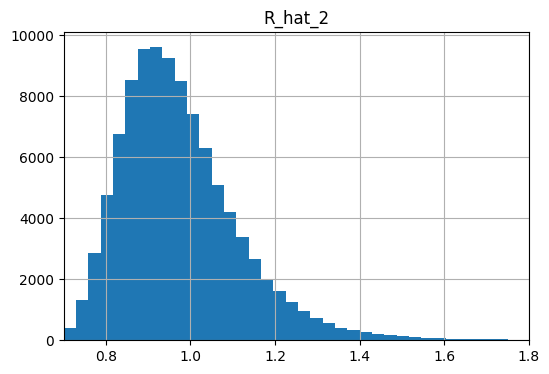

In [6]:
# histogram of R_hats
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
df.hist(column="R_hat_2", bins=100, ax=ax)
ax.set_xlim(0.7, 1.8)

(0.3, 2.5)

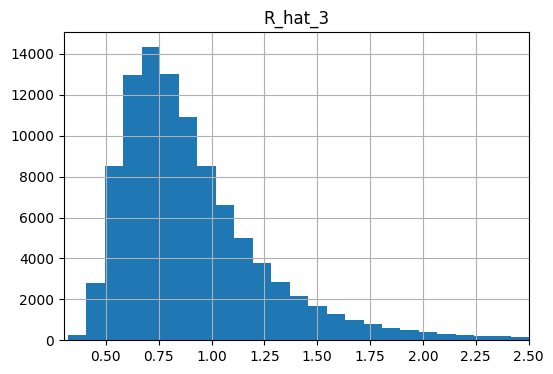

In [7]:
# histogram of R_hats
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
df.hist(column="R_hat_3", bins=200, ax=ax)
ax.set_xlim(0.3, 2.5)

In [8]:
quantiles = df.quantile([0.025, 0.05, 0.95, 0.975])
quantiles

,R_hat_2,R_hat_3,R_hat_4,R_hat_5
0.025,0.767475,0.485909,0.259642,0.118645
0.050,0.790276,0.521686,0.291814,0.141186
0.950,1.238014,1.656430,2.115506,2.405919
0.975,1.319103,1.964244,2.811091,3.581024


In [9]:
from scipy.stats import genpareto
def draw_generalised_pareto(gamma, sigma, n_samples):
    samples = genpareto.rvs(gamma, scale=sigma, loc=0, size=1000)
    log_samples = np.log(samples)
    # compute the first 4 R stats
    R_hats = {}
    for i in range(2, 6):
        R = R_stat(data=log_samples, order=i)
        R_hats[f"R_hat_{i}"] = R
    return R_hats

In [10]:
n_sims = 100000
results = []
for i in range(n_sims):
    results.append(draw_generalised_pareto(0.4, 1.75, 40))
df = pd.DataFrame(results)

In [11]:
df

,R_hat_2,R_hat_3,R_hat_4,R_hat_5
0,123.284780,-356.724870,10144.331883,-58402.131369
1,46.823040,-55.877355,1564.699015,-5022.318833
2,28.945052,-6.005785,450.940084,-675.376588
3,14.167522,2.780589,121.112283,-100.650590
4,72.682046,-87.730838,3143.892191,-9904.581852
...,...,...,...,...
99995,8.102553,-0.922238,46.915468,-74.593798
99996,29.436622,-20.194789,597.655184,-1604.829613
99997,27.561654,-4.557728,437.783947,-457.351991
99998,47.305058,-63.531992,1371.049732,-4056.277760


In [12]:
df.min()

R_hat_2    6.148582e+00
R_hat_3   -1.078684e+07
R_hat_4    1.922413e+01
R_hat_5   -2.015422e+12
dtype: float64

In [13]:
# find the mean in each column
df.mean()

R_hat_2    3.930862e+01
R_hat_3   -9.977718e+01
R_hat_4    2.007893e+05
R_hat_5   -7.483776e+06
dtype: float64

<Axes: >

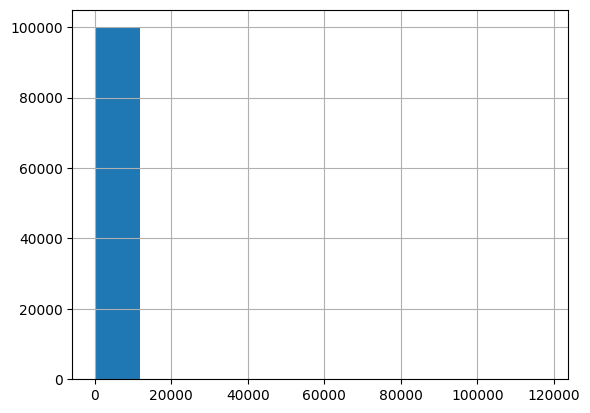

In [14]:
df['R_hat_2'].hist()

(0.0, 50.0)

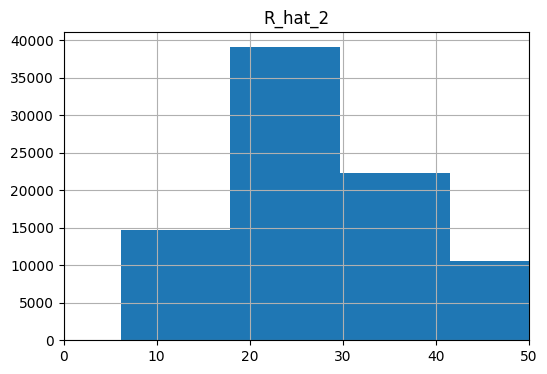

In [15]:
# histogram of R_hats
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
df.hist(column="R_hat_2", bins=10000, ax=ax)
ax.set_xlim(0, 50)

array([<Axes: title={'center': 'R_hat_3'}>], dtype=object)

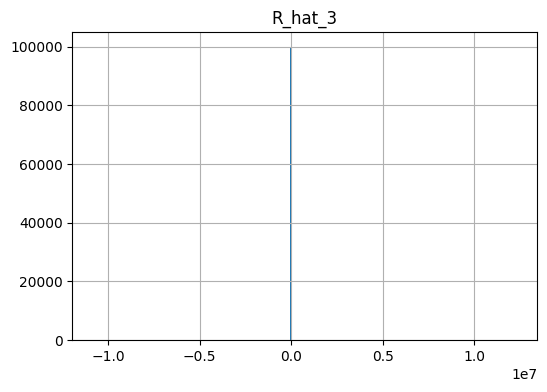

In [16]:
# histogram of R_hats
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
df.hist(column="R_hat_3", bins=200, ax=ax)
#ax.set_xlim(0.3, 2.5)